In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_json('cmpt-history.ndjson.gz', lines=True, convert_dates=['date'])

# Filtering: We don't need CHIN & DDP courses, co-op courses, research courses, or graduate level courses. We can filter these out
# Note: Even though research project courses can be full, we omit the courses as it is too dependent on non-quantifiable factors (eg: research topic, professor, etc.)
data = data.loc[data['subject'].apply(lambda x: x == 'CMPT' or x == 'MACM')] # Filtering non-CMPT or MACM courses
data = data.loc[data['number'].apply(lambda x: int(x[:3])<500)] # Filtering graduate-level courses, note: [:3] is to avoid edge cases such as 105W
data = data.loc[data['number'].apply(lambda x: int(x[:3]) < 426 or int(x[:3]) > 430)] # Filtering co-op courses
data = data.loc[data['number'].apply(lambda x: int(x[:3]) < 415 or int(x[:3]) > 416)] # Filtering research courses
data

# Note: Semester data, eg. 1241 : 
# First digit: 2x-th century, eg: 1 means 21st century
# Second and third digit: year 20xx, eg: 24 means 2024
# Fourth digit: Spring (1), Summer (4), Fall (7)

,semester,subject,number,section,campus,component,instr_mode,date,enrl_cap,enrl_tot,wait_tot
23,1241,CMPT,105W,D100,BRNBY,CAN,P,2023-08-11,200,0,0
24,1241,CMPT,105W,D100,BRNBY,CAN,P,2023-09-10,200,0,0
25,1241,CMPT,105W,D100,BRNBY,CAN,P,2023-10-10,200,0,0
26,1241,CMPT,105W,D200,BRNBY,LEC,P,2023-08-11,200,0,0
27,1241,CMPT,105W,D200,BRNBY,LEC,P,2023-09-10,200,0,0
...,...,...,...,...,...,...,...,...,...,...,...
66340,1171,CMPT,497,D100,BRNBY,SEC,P,2017-03-03,5,3,0
66383,1171,MACM,101,D100,BRNBY,LEC,P,2017-03-03,175,158,0
66384,1171,MACM,101,D100,BRNBY,LEC,P,2017-05-05,175,157,0
66385,1171,MACM,101,D200,BRNBY,LEC,P,2017-03-03,175,173,0


In [3]:
# Test: Graphing the enrollment data of CMPT 433

testData = data.loc[data['number'] == '433']
testData = testData.loc[testData['semester'] >= 1231]
testData = testData.sort_values(by=['date'])
testData


,semester,subject,number,section,campus,component,instr_mode,date,enrl_cap,enrl_tot,wait_tot
12430,1231,CMPT,433,D100,SURRY,LEC,P,2022-08-07,100,0,0
12431,1231,CMPT,433,D100,SURRY,LEC,P,2022-09-06,100,0,0
12432,1231,CMPT,433,D100,SURRY,LEC,P,2022-10-06,100,0,0
12433,1231,CMPT,433,D100,SURRY,LEC,P,2022-11-05,100,0,0
12434,1231,CMPT,433,D100,SURRY,LEC,P,2022-11-08,100,11,0
12435,1231,CMPT,433,D100,SURRY,LEC,P,2022-11-09,100,12,0
12436,1231,CMPT,433,D100,SURRY,LEC,P,2022-11-11,100,21,0
12437,1231,CMPT,433,D100,SURRY,LEC,P,2022-11-12,100,22,0
12438,1231,CMPT,433,D100,SURRY,LEC,P,2022-11-14,100,23,0
12439,1231,CMPT,433,D100,SURRY,LEC,P,2022-11-15,100,41,0


,semester,subject,number,section,campus,component,instr_mode,date,enrl_cap,enrl_tot,wait_tot
12430,1231,CMPT,433,D100,SURRY,LEC,P,2022-08-07,100,0,0
12431,1231,CMPT,433,D100,SURRY,LEC,P,2022-09-06,100,0,0
12432,1231,CMPT,433,D100,SURRY,LEC,P,2022-10-06,100,0,0
12433,1231,CMPT,433,D100,SURRY,LEC,P,2022-11-05,100,0,0
12434,1231,CMPT,433,D100,SURRY,LEC,P,2022-11-08,100,11,0
12435,1231,CMPT,433,D100,SURRY,LEC,P,2022-11-09,100,12,0
12436,1231,CMPT,433,D100,SURRY,LEC,P,2022-11-11,100,21,0
12437,1231,CMPT,433,D100,SURRY,LEC,P,2022-11-12,100,22,0
12438,1231,CMPT,433,D100,SURRY,LEC,P,2022-11-14,100,23,0
12439,1231,CMPT,433,D100,SURRY,LEC,P,2022-11-15,100,41,0


(array([19236., 19297., 19358., 19417., 19478., 19539., 19601., 19662.]),
 [Text(19236.0, 0, '2022-09'),
  Text(19297.0, 0, '2022-11'),
  Text(19358.0, 0, '2023-01'),
  Text(19417.0, 0, '2023-03'),
  Text(19478.0, 0, '2023-05'),
  Text(19539.0, 0, '2023-07'),
  Text(19601.0, 0, '2023-09'),
  Text(19662.0, 0, '2023-11')])

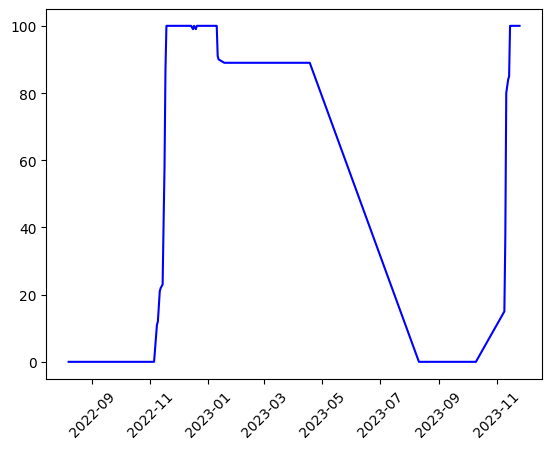

In [4]:
plt.plot(testData.loc[testData['date'] < '2023-01-18']['date'], testData.loc[testData['date'] < '2023-01-18']['enrl_tot'], 'b-')
plt.xticks(rotation=45)
